In [2]:
import zipfile
import pandas as pd
import os

In [4]:
# Define the correct path to your ZIP file
zip_file_path = r"C:\Users\microstar\Desktop\indo\archive (2).zip"  # 🔹 Use 'r' to handle Windows paths

# Extract the ZIP file
extract_folder = "extracted_data"  # Folder where files will be extracted
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List all extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

Extracted files: ['ratings_Electronics (1).csv']


In [6]:
csv_file_path = "extracted_data/ratings_Electronics (1).csv"  

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [8]:
# Reload the CSV file with column names
column_names = ["UserID", "ProductID", "Rating", "Timestamp"]  
df = pd.read_csv(csv_file_path, names=column_names)

# Display the first 5 rows after renaming columns
df.head()

,UserID,ProductID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     object 
 1   ProductID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [12]:
# Check for missing values in each column
df.isnull().sum()

UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64

In [14]:
# Check for duplicate rows
df.duplicated().sum()

0

## Convert Timestamp to Readable Date

In [19]:
# Convert Timestamp to a readable date format
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

# Display the first 5 rows to check the new format
df.head()

,UserID,ProductID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


## Understanding the Sentiment Analysis Approach

In [22]:
# Define a function to classify sentiment based on Rating
def classify_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply the function to create a new column
df["Sentiment"] = df["Rating"].apply(classify_sentiment)

# Display the first 5 rows to check the new column
df.head()

,UserID,ProductID,Rating,Timestamp,Sentiment
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13,Positive
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01,Positive
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29,Negative
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22,Neutral
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18,Negative


## Analyze Sentiment Distribution

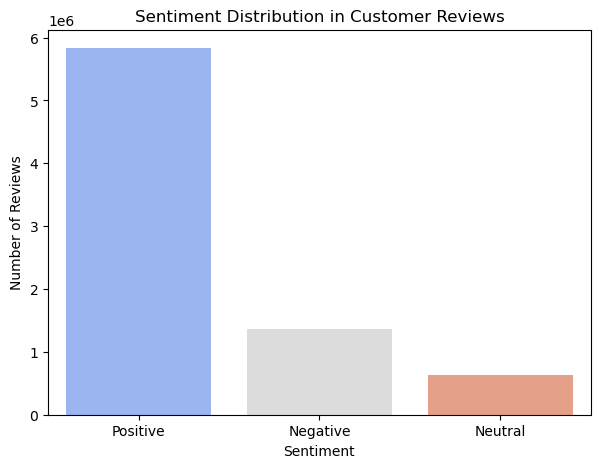

In [27]:
# Plot the sentiment distribution with updated syntax
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, dodge=False, legend=False, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution in Customer Reviews")
plt.show()

## Check the Average Rating for Each Sentiment

In [30]:
# Calculate the average rating for each sentiment
avg_rating_per_sentiment = df.groupby("Sentiment")["Rating"].mean()

# Display the results
print(avg_rating_per_sentiment)

Sentiment
Negative    1.336004
Neutral     3.000000
Positive    4.745294
Name: Rating, dtype: float64


## Analyze Trends Over Time

<Figure size 1000x500 with 0 Axes>

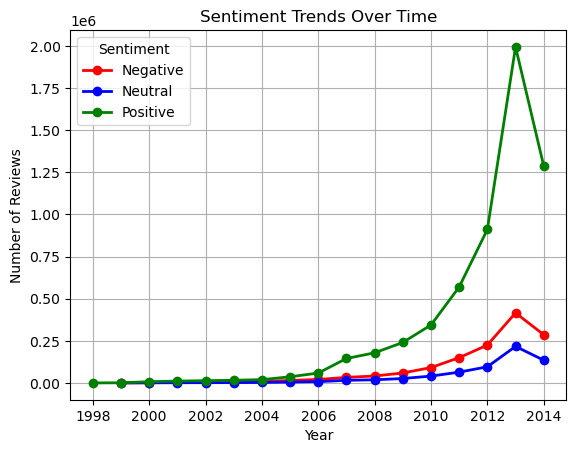

In [41]:
# Extract the year from the Timestamp column
df["Year"] = df["Timestamp"].dt.year

# Count the number of reviews per sentiment for each year
sentiment_trends = df.groupby(["Year", "Sentiment"]).size().unstack()

# Plot the sentiment trends over the years
plt.figure(figsize=(10, 5))
sentiment_trends.plot(kind="line", marker="o", linewidth=2, color={"Negative": "red", "Neutral": "blue", "Positive": "green"})
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Trends Over Time")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

In [37]:
top_products = df.groupby("ProductID")["Rating"].mean().sort_values(ascending=False).head(10)
print(top_products)

ProductID
0132793040    5.0
B004SGH244    5.0
B004SQBRRM    5.0
B004SQC6O0    5.0
B004SQE6YI    5.0
B004SQFFCK    5.0
B004SQOR0G    5.0
B004SQVHU4    5.0
B004SQX8W4    5.0
B004SQYSUK    5.0
Name: Rating, dtype: float64
